<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

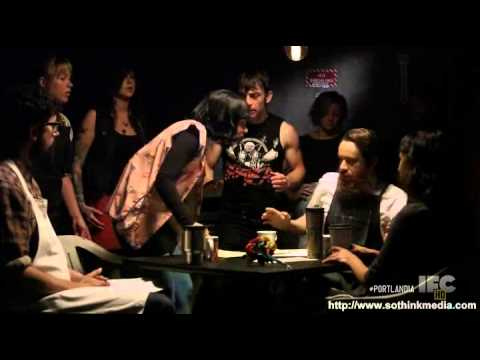

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/media/shared/projects/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
import numpy as np

shops["star_rating"] = shops["star_rating"].apply(lambda s: s.strip(" star rating"))
shops["star_rating"] = shops["star_rating"].astype(np.float64)
shops["star_rating"].dtype

dtype('float64')

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [7]:
shops["date"] = pd.to_datetime(shops["full_review_text"].apply(lambda s: s.strip().split(" ")[0]))
shops["date"].head()

0   2016-11-25
1   2016-12-02
2   2016-11-30
3   2016-11-25
4   2016-12-03
Name: date, dtype: datetime64[ns]

In [8]:
shops["full_review_text"].head()

0     11/25/2016 1 check-in Love love loved the atm...
1     12/2/2016 Listed in Date Night: Austin, Ambia...
2     11/30/2016 1 check-in Listed in Brunch Spots ...
3     11/25/2016 Very cool decor! Good drinks Nice ...
4     12/3/2016 1 check-in They are located within ...
Name: full_review_text, dtype: object

In [9]:
shops["full_review_text"].iloc[1]

' 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. '

### More Cleaning
This can be done using stopwords but I'm using pure python for now

In [10]:
import re

stoppers = r'(\d+\s+check-ins?)|(Listed\s+in\s+)'
print(re.sub(stoppers, "", "2 check-ins Listed in \"blah, blah, blah\" this is ", flags=re.I))
print(re.sub(stoppers, "", "1 check-in Listed in Americano this is"))
def grab_text(s):
    s = " ".join(s.strip().split(" ")[1:])
    s = re.sub(stoppers, "", s)
    return s.strip()
    
shops["review_text"] = shops["full_review_text"].apply(grab_text)
shops["review_text"].head(20)

 "blah, blah, blah" this is 
 Americano this is


0     Love love loved the atmosphere! Every corner o...
1     Date Night: Austin, Ambiance in Austin BEAUTIF...
2     Brunch Spots I loved the eclectic and homey pl...
3     Very cool decor! Good drinks Nice seating  How...
4     They are located within the Northcross mall sh...
5     Very cute cafe! I think from the moment I step...
6     "Nuptial Coffee Bliss!", Anderson Lane is the ...
7     Love this place!  5 stars for cleanliness 5 st...
8     Ok, let's try this approach...  Pros: Music Se...
9     This place has been shown on my social media f...
10    Americano This is not your average cute study ...
11    The store has A+ decoration, but honestly, the...
12    2016 - The Third Time is a Charm! The Factory ...
13    This is such a cute little cafe! I've driven b...
14    Beautiful eccentric coffee shop with a library...
15    In Search of Fantastic Coffee So, I really did...
16    Really love the atmosphere here! I frequent co...
17    Check out this video for a review! youtube

### Now try to do this with stop words

In [58]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [87]:
tokens = []
for doc in tokenizer.pipe(shops["review_text"], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(doc_tokens)

shops["tokens"] = tokens
shops["tokens"].head()

0    [love, love, love, atmosphere, corner, coffee,...
1    [date, night, austin, ambiance, austin, beauti...
2    [brunch, spots, love, eclectic, homey, plush, ...
3    [cool, decor, good, drink, nice, seat, however...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [88]:
from collections import Counter

# copied by hand, not copy/pasted
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    num_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    wc = pd.DataFrame(
        zip(
            word_counts.keys(),
            word_counts.values(),
        ), columns = ["word", "count"]
    )
    
    wc["rank"] = wc["count"].rank(method="first", ascending=False)
    total = wc["count"].sum()
    
    wc["pct_total"] = wc["count"].apply(lambda x: x / total)
    
    wc = wc.sort_values(by="rank")
    wc["cul_pct_total"] = wc["pct_total"].cumsum()
    
    ac = pd.DataFrame(
        zip(
            appears_in.keys(),
            appears_in.values(),
        ),
        columns = ["word", "appears_in"]
    )
    wc = ac.merge(wc, on="word")
    
    wc["appears_in_pct"] = wc["appears_in"].apply(lambda x: x/num_docs)
    return wc.sort_values(by="rank")

wc = count(shops["tokens"])

In [89]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,4905,10496,1.0,0.027317,0.027317,0.644039
100,place,3838,5906,2.0,0.015371,0.042688,0.503939
154,good,2846,4090,3.0,0.010645,0.053333,0.373687
129,great,2851,3941,4.0,0.010257,0.063590,0.374343
147,like,2251,3333,5.0,0.008674,0.072264,0.295562


### separate ratings

In [90]:
bad_shops = shops[shops["star_rating"] < 3.0]
good_shops = shops[shops["star_rating"] >= 3.0]

In [91]:
wc_bad = count(bad_shops["tokens"])
wc_good = count(good_shops["tokens"])

In [92]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,coffee,446,978,1.0,0.022492,0.022492,0.604336
32,place,370,608,2.0,0.013983,0.036475,0.501355
2,like,292,475,3.0,0.010924,0.047399,0.395664
39,order,233,435,4.0,0.010004,0.057403,0.315718
13,good,271,367,5.0,0.008440,0.065843,0.367209


In [93]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,4459,9518,1.0,0.027933,0.027933,0.648299
100,place,3468,5298,2.0,0.015548,0.043481,0.504216
129,great,2697,3735,3.0,0.010961,0.054442,0.392120
190,good,2575,3723,4.0,0.010926,0.065368,0.374382
215,its,1907,2902,5.0,0.008517,0.073885,0.277261


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


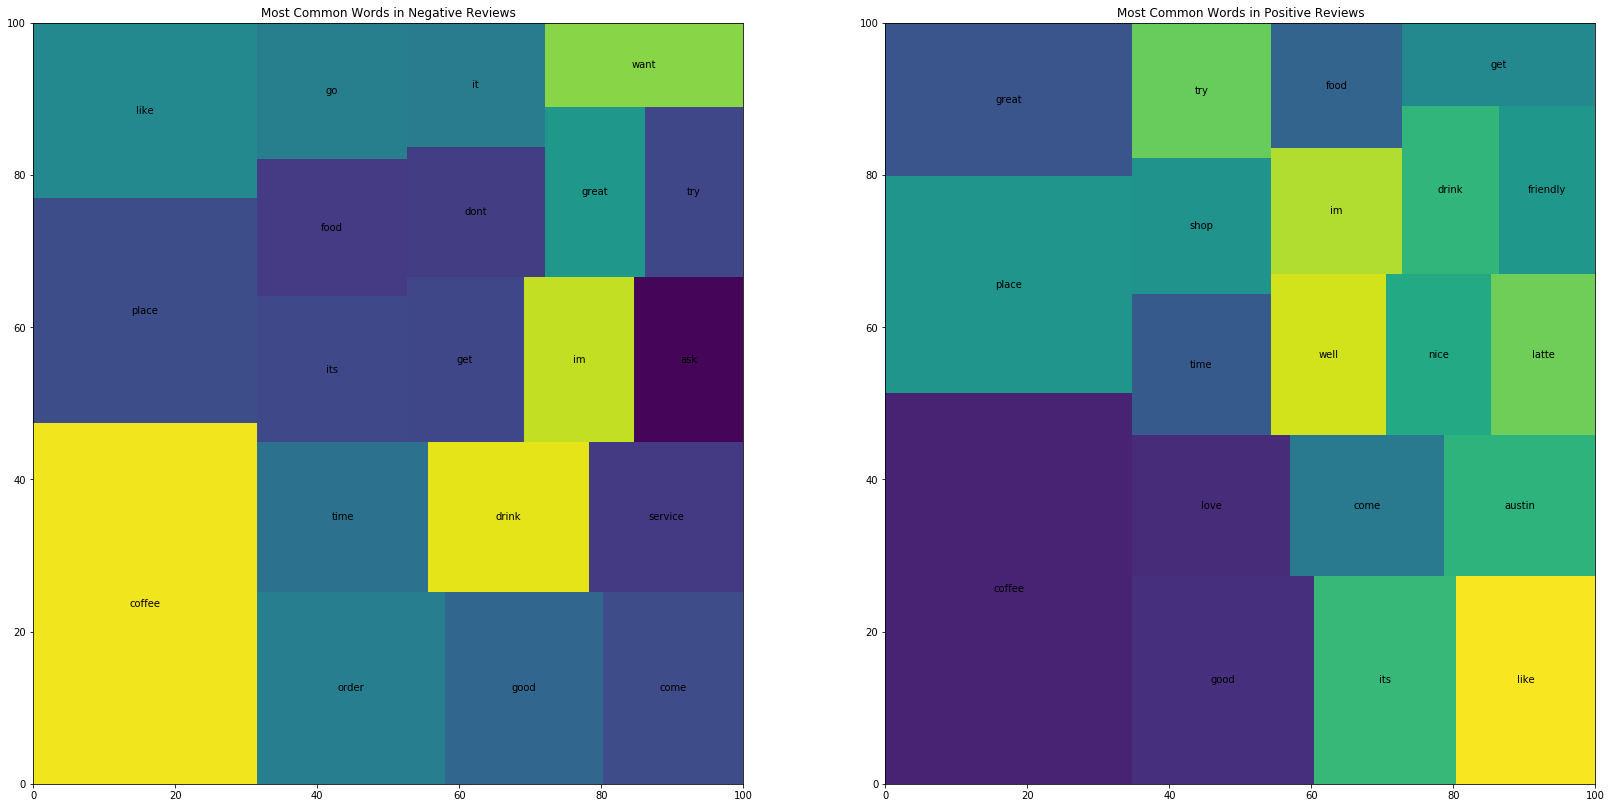

In [94]:
import squarify
from matplotlib import pyplot as plt

top20_bad = wc_bad[wc_bad["rank"] <= 20]
top20_good = wc_good[wc_good["rank"] <= 20]

fig, axes = plt.subplots(ncols=2, figsize=(28, 14))
ax1, ax2 = axes

ax1.set_title("Most Common Words in Negative Reviews")
squarify.plot(sizes=top20_bad["pct_total"], label=wc_bad["word"], ax=ax1)

ax2.set_title("Most Common Words in Positive Reviews")
squarify.plot(sizes=top20_good["pct_total"], label=wc_good["word"], ax=ax2)

In [98]:
set(top20_good["word"]) - set(top20_bad["word"])

{'austin', 'friendly', 'latte', 'love', 'nice', 'shop', 'well'}

In [99]:
set(top20_bad["word"]) - set(top20_good["word"])

{'ask', 'dont', 'go', 'it', 'order', 'service', 'want'}

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

